In [1]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the dataset
dataset_path = '/content/drive/My Drive/Machine learning/Plant disease/PlantVillage/'

# List all folders within the PlantVillage directory
folders = os.listdir(dataset_path)
print("Folders:", folders)

# Iterate through each folder and list the image files
for folder in folders:
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        images = os.listdir(folder_path)
        print(f"Images in {folder}: {images[:5]}")  # Display the first 5 images for brevity

Mounted at /content/drive
Folders: ['Pepper__bell___healthy', 'Pepper__bell___Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'PlantVillage', 'Potato___healthy', 'Tomato_Late_blight', 'Tomato__Tomato_mosaic_virus', 'Tomato_Septoria_leaf_spot', 'Tomato__Target_Spot', 'Tomato_Leaf_Mold', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Spider_mites_Two_spotted_spider_mite']
Images in Pepper__bell___healthy: ['4265d731-d90c-42e8-961d-5784472b4e95___JR_HL 7794.JPG', '41b94c99-7063-42dc-9ce7-22ff087317e9___JR_HL 7696.JPG', '4173faa6-34ef-4759-a763-4102f8f5f2d5___JR_HL 8542.JPG', '40b05b00-37a9-42c7-b98f-39ec77a58003___JR_HL 7773.JPG', '401e43fb-f5f5-40b7-9fe8-d466ecb233c7___JR_HL 8137.JPG']
Images in Pepper__bell___Bacterial_spot: ['0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG', '032aa7c4-0a95-4f09-b0bb-1242f4f32d82___NREC_B.Spot 1889.JPG', '08485974-1e38-4e34-b296-fadd9cc26942___NREC_B.Spot 919

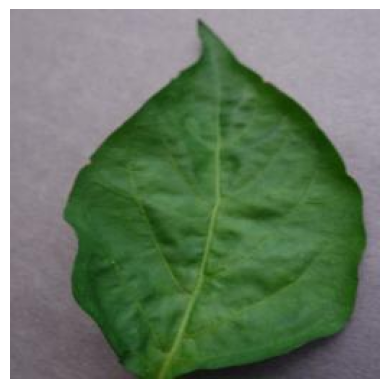

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

# Corrected path for 'Pepper_bell__healthy' folder
image_path = os.path.join(dataset_path, 'Pepper__bell___healthy', '4265d731-d90c-42e8-961d-5784472b4e95___JR_HL 7794.JPG')

# Open and display the image
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

In [7]:
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt

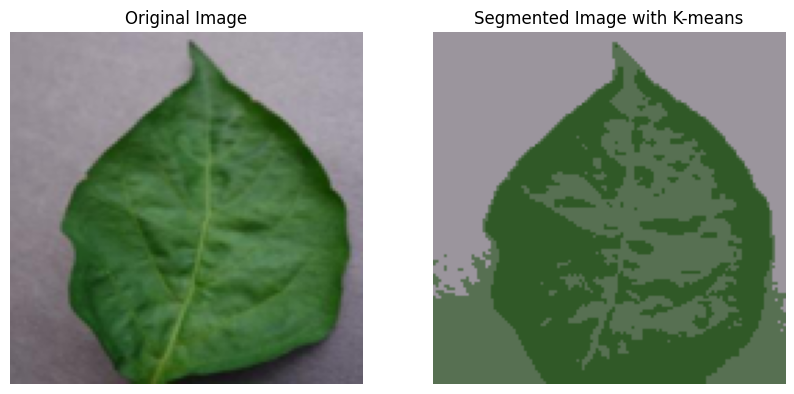

In [8]:
image = image.resize((128, 128))  # Resize to make computation faster

# Convert image to numpy array
image_np = np.array(image)

# Reshape the image to be a list of pixels (R, G, B values)
pixels = image_np.reshape(-1, 3)

# Number of clusters
n_clusters = 3

# Initialize random centroids from the image pixels
centroids = np.array([pixels[random.randint(0, len(pixels) - 1)] for _ in range(n_clusters)])

# Function to calculate the Euclidean distance between two points
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Function to assign each pixel to the nearest centroid
def assign_to_centroids(pixels, centroids):
    clusters = [[] for _ in range(len(centroids))]
    for pixel in pixels:
        distances = [euclidean_distance(pixel, centroid) for centroid in centroids]
        nearest_centroid = np.argmin(distances)
        clusters[nearest_centroid].append(pixel)
    return clusters

# Function to recalculate centroids as the mean of assigned points
def calculate_new_centroids(clusters):
    return np.array([np.mean(cluster, axis=0) for cluster in clusters if len(cluster) > 0])

# K-means algorithm
def kmeans(pixels, centroids, max_iters=100):
    for _ in range(max_iters):
        # Assign each pixel to the nearest centroid
        clusters = assign_to_centroids(pixels, centroids)

        # Recalculate centroids
        new_centroids = calculate_new_centroids(clusters)

        # If centroids don't change, we are done
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, clusters

# Run K-means
final_centroids, final_clusters = kmeans(pixels, centroids)

# Reconstruct the image from clusters
segmented_img = np.zeros_like(pixels)

for i, cluster in enumerate(final_clusters):
    for pixel in cluster:
        segmented_img[np.where((pixels == pixel).all(axis=1))] = final_centroids[i]

# Reshape the segmented image to its original shape
segmented_img = segmented_img.reshape(image_np.shape)

# Convert segmented image to integers
segmented_img = segmented_img.astype(int)

# Display the original and segmented images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img)
plt.title("Segmented Image with K-means")
plt.axis('off')

plt.show()

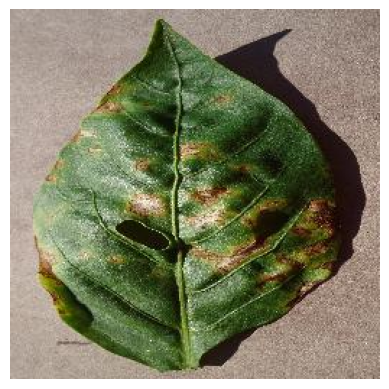

In [9]:
image_path = os.path.join(dataset_path, 'Pepper__bell___Bacterial_spot', '0a4c007d-41ab-4659-99cb-8a4ae4d07a55___NREC_B.Spot 1954.JPG')

# Open and display the image
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

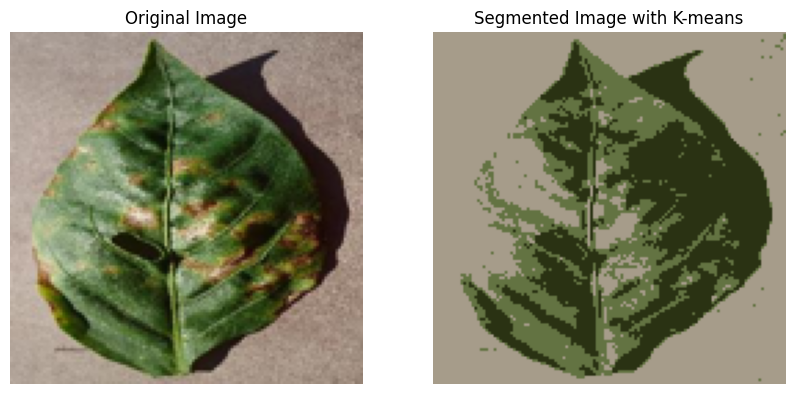

In [10]:
image = image.resize((128, 128))  # Resize to make computation faster

# Convert image to numpy array
image_np = np.array(image)

# Reshape the image to be a list of pixels (R, G, B values)
pixels = image_np.reshape(-1, 3)

# Number of clusters
n_clusters = 3

# Initialize random centroids from the image pixels
centroids = np.array([pixels[random.randint(0, len(pixels) - 1)] for _ in range(n_clusters)])

# Function to calculate the Euclidean distance between two points
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Function to assign each pixel to the nearest centroid
def assign_to_centroids(pixels, centroids):
    clusters = [[] for _ in range(len(centroids))]
    for pixel in pixels:
        distances = [euclidean_distance(pixel, centroid) for centroid in centroids]
        nearest_centroid = np.argmin(distances)
        clusters[nearest_centroid].append(pixel)
    return clusters

# Function to recalculate centroids as the mean of assigned points
def calculate_new_centroids(clusters):
    return np.array([np.mean(cluster, axis=0) for cluster in clusters if len(cluster) > 0])

# K-means algorithm
def kmeans(pixels, centroids, max_iters=100):
    for _ in range(max_iters):
        # Assign each pixel to the nearest centroid
        clusters = assign_to_centroids(pixels, centroids)

        # Recalculate centroids
        new_centroids = calculate_new_centroids(clusters)

        # If centroids don't change, we are done
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, clusters

# Run K-means
final_centroids, final_clusters = kmeans(pixels, centroids)

# Reconstruct the image from clusters
segmented_img = np.zeros_like(pixels)

for i, cluster in enumerate(final_clusters):
    for pixel in cluster:
        segmented_img[np.where((pixels == pixel).all(axis=1))] = final_centroids[i]

# Reshape the segmented image to its original shape
segmented_img = segmented_img.reshape(image_np.shape)

# Convert segmented image to integers
segmented_img = segmented_img.astype(int)

# Display the original and segmented images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img)
plt.title("Segmented Image with K-means")
plt.axis('off')

plt.show()